In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
file = r'https://raw.githubusercontent.com/PritamSS/ml3/main/heart.csv'

df_heart = pd.read_csv(file)

df_heart_2 = df_heart.copy()

In [ ]:
j = 0
for i in df_heart['Sex'].unique():
  df_heart_2['Sex']=df_heart_2['Sex'].replace(i, j)
  j = j+1

print(df_heart['Sex'].unique())
print(df_heart_2['Sex'].unique())


j = 0
for i in df_heart['ChestPainType'].unique():
  df_heart_2['ChestPainType']=df_heart_2['ChestPainType'].replace(i, j)
  j = j+1

print(df_heart['ChestPainType'].unique())
print(df_heart_2['ChestPainType'].unique())

j = 0
for i in df_heart['RestingECG'].unique():
  df_heart_2['RestingECG']=df_heart_2['RestingECG'].replace(i, j)
  j = j+1

print(df_heart['RestingECG'].unique())
print(df_heart_2['RestingECG'].unique())

j = 0
for i in df_heart['ExerciseAngina'].unique():
  df_heart_2['ExerciseAngina']=df_heart_2['ExerciseAngina'].replace(i, j)
  j = j+1


print(df_heart['ExerciseAngina'].unique())
print(df_heart_2['ExerciseAngina'].unique())

j = 0
for i in df_heart_2['ST_Slope'].unique():
  df_heart_2['ST_Slope']=df_heart_2['ST_Slope'].replace(i, j)
  j = j+1

print(df_heart['ST_Slope'].unique())
print(df_heart_2['ST_Slope'].unique())

['M' 'F']
[0 1]
['ATA' 'NAP' 'ASY' 'TA']
[0 1 2 3]
['Normal' 'ST' 'LVH']
[0 1 2]
['N' 'Y']
[0 1]
['Up' 'Flat' 'Down']
[0 1 2]


In [ ]:
df = df_heart_2[df_heart_2.Cholesterol != 0]

Model Accuracy is:85.03
Recall Score is:84.09
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        99
           1       0.84      0.84      0.84        88

    accuracy                           0.85       187
   macro avg       0.85      0.85      0.85       187
weighted avg       0.85      0.85      0.85       187



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


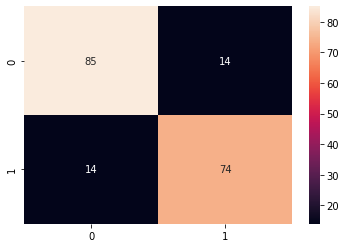

In [ ]:
X=df.drop('HeartDisease', axis=1)
Y=df['HeartDisease']

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25)

lr = LogisticRegression()
classifier = lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(Y_test,y_pred)*100
rec = recall_score(Y_test,y_pred)*100


print('Model Accuracy is:{}'.format(round((acc),2)))
print('Recall Score is:{}'.format(round((rec),2)))
print(classification_report(Y_test,y_pred))

cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
X=df.drop('HeartDisease', axis=1)
Y=df['HeartDisease']

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25)

tree=DecisionTreeClassifier()
tree.fit(X_train, Y_train)

print("training set score:%f" % tree.score(X_train, Y_train))
print("testing set score:%f" % tree.score(X_test, Y_test))

training set score:1.000000
testing set score:0.812834


In [ ]:
from sklearn.model_selection import cross_val_score

tree_cross_val = DecisionTreeClassifier()

scores= cross_val_score(tree_cross_val, X, Y, cv=5)

print("Training cross validation scores:", scores)
print("mean score:", scores.mean())

Training cross validation scores: [0.78666667 0.82550336 0.80536913 0.60402685 0.69127517]
mean score: 0.7425682326621924


In [ ]:
best_score=0

for depth in range(2,10):
  for split in range(2,5): 
    for leaf in range(5, 20):
      for criteria in ['gini', 'entropy']:
        tree_grid_search=DecisionTreeClassifier(criterion=criteria, max_depth=depth, min_samples_split=split, max_leaf_nodes=leaf)

        tree_grid_search.fit(X_train, Y_train)
        score=tree_grid_search.score(X_test, Y_test)

        if  score > best_score:
          best_score = score
          best_parameters={'Depth': depth, 'Split': split, 'Leaves':leaf, 'Criterion':criteria}

print("best score =", best_score)
print(best_parameters)

best score = 0.8449197860962567
{'Depth': 3, 'Split': 2, 'Leaves': 7, 'Criterion': 'gini'}


In [ ]:
X=df.drop('HeartDisease', axis=1)
Y=df['HeartDisease']

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25)


rfc = RandomForestClassifier(n_estimators=1000,random_state=0)
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)

In [ ]:
acc = accuracy_score(Y_test,y_pred)*100
rec = recall_score(Y_test,y_pred)*100
print('Model Accuracy is:{}'.format(round((acc),2)))
print('Recall Score is:{}'.format(round((rec),2)))
print(classification_report(Y_test,y_pred))

Model Accuracy is:83.42
Recall Score is:86.32
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        92
           1       0.82      0.86      0.84        95

    accuracy                           0.83       187
   macro avg       0.84      0.83      0.83       187
weighted avg       0.84      0.83      0.83       187

